In [ ]:
import pandas as pd
import climateFunctions as clf
import matplotlib.pyplot as plt
import importlib

In [25]:
importlib.reload(clf)
migration_dataset = "C:/Users/ashwi/Desktop/Ashwin/UCSD/Quarters/FA24/ECE143/project/dataset/migration/NABBP_2023_grp_03.csv"
world_shape = "C:/Users/ashwi/Desktop/Ashwin/UCSD/Quarters/FA24/ECE143/project/dataset/geodata/110m_cultural.zip"
species_id = [1723]
tracking_year = 2010

In [26]:
df = pd.read_csv(migration_dataset)

C:\Users\ashwi\AppData\Local\Temp\ipykernel_16948\1847292297.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(migration_dataset)


C:\Users\ashwi\AppData\Local\Temp\ipykernel_16948\185693747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species_data['MONTH_YEAR'] = pd.to_datetime(species_data['EVENT_YEAR'].astype(str) + '-' + species_data['EVENT_MONTH'].astype(str), errors='coerce')
c:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\geopandas.py:265: UserWarning: More than one layer found in '110m_cultural.zip': 'ne_110m_admin_0_countries' (default), 'ne_110m_admin_0_countries_lakes', 'ne_110m_populated_places', 'ne_110m_admin_1_states_provinces_lakes', 'ne_110m_admin_0_scale_rank', 'ne_110m_admin_1_states_provinces_lines', 'ne_110m_admin_0_boundary_lines_land', 'ne_110m_populated_places_simple', 'ne_110m_admin_0_pacific_groupings', 'ne_11

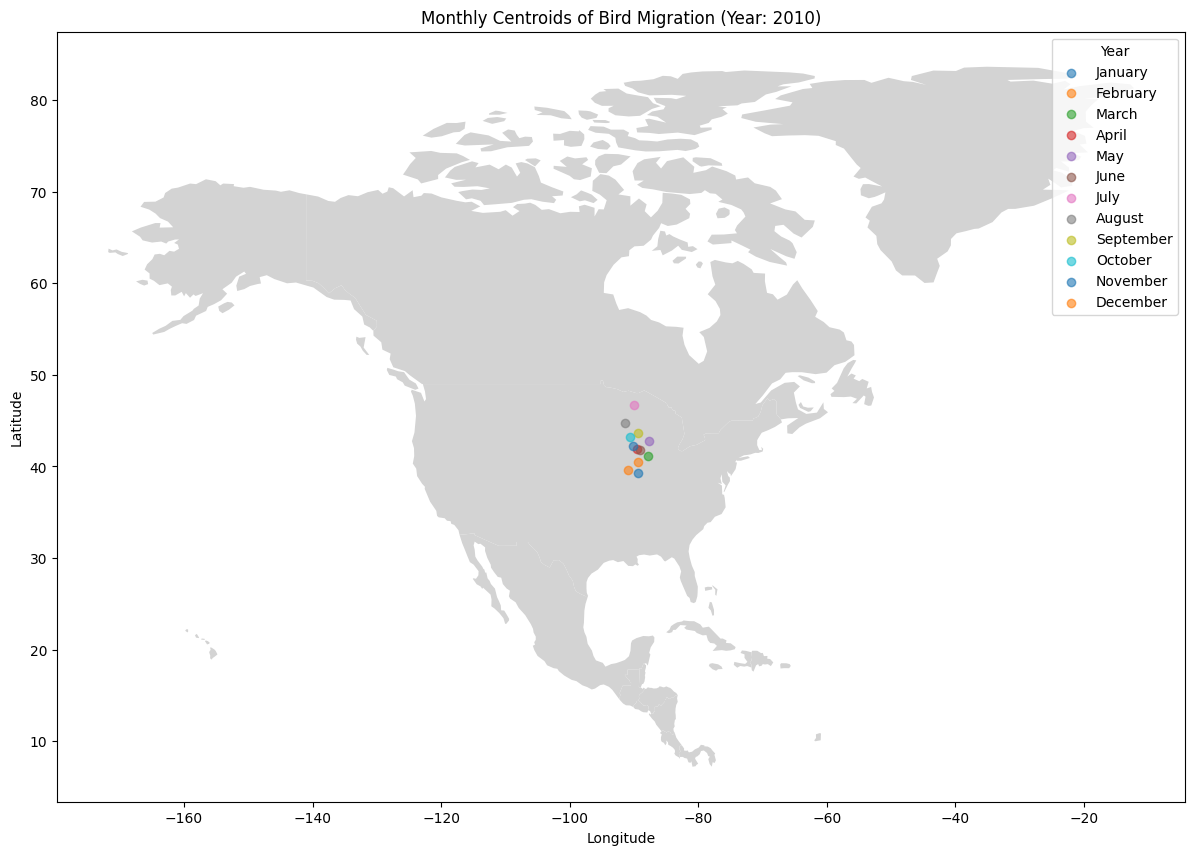

In [27]:
if species_id:
    species_data = df[df['SPECIES_ID'].isin(species_id)]    
else:
    species_data = df
species_data['MONTH_YEAR'] = pd.to_datetime(species_data['EVENT_YEAR'].astype(str) + '-' + species_data['EVENT_MONTH'].astype(str), errors='coerce')
migration_path = species_data[['MONTH_YEAR', 'EVENT_MONTH', 'EVENT_YEAR', 'LAT_DD', 'LON_DD']].dropna()
migration_path = migration_path[migration_path['EVENT_YEAR'] == tracking_year]

monthly_centroids = clf.calcCentroidPerMonthYear(migration_path)

clf.plotMonthlyCentroids(world_shape, monthly_centroids)
